<a href="https://colab.research.google.com/github/srik15/RBG-Team-Gamma/blob/main/Yolov8.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME =os.getcwd()
print(HOME)

/content


In [ ]:
from IPython import display
display.clear_output()

In [ ]:
pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
# prompt: change directory
# os.chdir('/content/drive/MyDrive/my_project')

%cd drive

/content/drive


In [ ]:
%cd MyDrive

/content/drive/MyDrive


In [ ]:
%cd train

/content/drive/MyDrive/train


In [ ]:
pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

In [ ]:
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key="4ZQZQocTaUHGSD3UJQUi")
project = rf.workspace("rbg-sa6qs").project("animals-sijbr")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO

In [ ]:
detections=model.predict("/content/ZJ001239.jpg", confidence=10, overlap=20).json()
print(detections)

{'predictions': [{'x': 460.0, 'y': 167.0, 'width': 336.0, 'height': 334.0, 'confidence': 0.3655470907688141, 'class': 'leopard', 'class_id': 0, 'detection_id': '2b2fe802-ff88-4d55-896c-a3ddb0d587c1', 'image_path': '/content/ZJ001239.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '335'}}


In [ ]:
import json

In [ ]:
def save_text_to_json(text, json_path):
    with open(json_path, 'w') as json_file:
        json.dump(text, json_file, indent=4)

save_text_to_json( {'predictions': [{'x': 460.0,
                  'y': 167.0,
                  'width': 336.0,
                  'height': 334.0, 'confidence': 0.3655470907688141, 'class': 'leopard', 'class_id': 0, 'detection_id': '2b2fe802-ff88-4d55-896c-a3ddb0d587c1', 'image_path': '/content/ZJ001239.jpg',
                  'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '335'}},"/content/box_result.json")


In [ ]:
# visualize your prediction
model.predict("/content/ZJ001239.jpg",confidence=40,overlap=30).save("/content/prediction.jpg")

In [ ]:
for bounding_box in detections['predictions']:
    x1 = bounding_box['x'] - bounding_box['width'] / 2
    x2 = bounding_box['x'] + bounding_box['width'] / 2
    y1 = bounding_box['y'] - bounding_box['height'] / 2
    y2 = bounding_box['y'] + bounding_box['height'] / 2
    box = (x1, x2, y1, y2)
print(box)

(292.0, 628.0, 0.0, 334.0)
628.0


In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Image_path="/content/prediction.jpg"

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

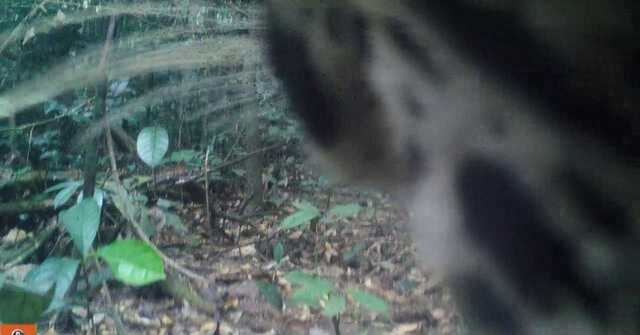

In [ ]:
img=Image.open(Image_path)
img

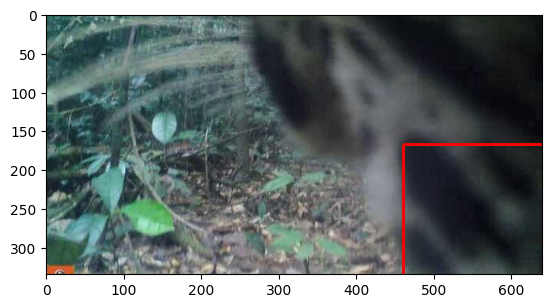

In [ ]:
fig,ax = plt.subplots(1)
ax.imshow(img)
rect = patches.Rectangle((bounding_box['x'], bounding_box['y']), bounding_box['width'],bounding_box['height'], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

{'predictions': [{'x': 593.5, 'y': 64.0, 'width': 89.0, 'height': 126.0, 'confidence': 0.0186234712600708, 'class': 'leopard', 'class_id': 0, 'detection_id': '87ac0d6f-a063-4be6-ac0f-d170e1a736b5', 'image_path': '/content/ZJ016565.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '335'}}


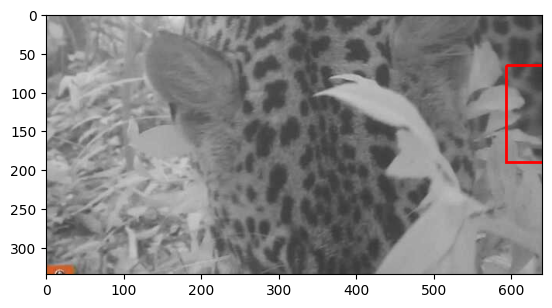

In [ ]:
detections2=model.predict("/content/ZJ016565.jpg", confidence=1, overlap=2).json()
print(detections2)

save_text_to_json( detections2,"/content/box_result2.json")

# visualize your prediction
model.predict("/content/ZJ016565.jpg",confidence=40,overlap=30).save("/content/prediction2.jpg")

Image_path2="/content/prediction2.jpg"

img2=Image.open(Image_path2)
img2

fig,ax = plt.subplots(1)
ax.imshow(img2)

for bounding_box in detections2['predictions']:
    x1 = bounding_box['x'] - bounding_box['width'] / 2
    x2 = bounding_box['x'] + bounding_box['width'] / 2
    y1 = bounding_box['y'] - bounding_box['height'] / 2
    y2 = bounding_box['y'] + bounding_box['height'] / 2
    box2 = (x1, x2, y1, y2)

rect2 = patches.Rectangle((bounding_box['x'], bounding_box['y']), bounding_box['width'],bounding_box['height'], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect2)
plt.show()